In [1]:
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler

In [2]:
baredf = pd.read_csv("../data7s/bot/UNSW_2018_IoT_Botnet_Full5pc_4.csv")

/tmp/ipykernel_93280/391569721.py:1: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  baredf = pd.read_csv("../data7s/bot/UNSW_2018_IoT_Botnet_Full5pc_4.csv")


In [3]:
baredf.head(5)

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,3000001,1.528099e+09,e,1,udp,3,192.168.100.147,6226,192.168.100.3,80,...,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS,UDP
1,3000002,1.528099e+09,e,1,udp,3,192.168.100.147,6227,192.168.100.3,80,...,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS,UDP
2,3000003,1.528099e+09,e,1,udp,3,192.168.100.147,6228,192.168.100.3,80,...,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS,UDP
3,3000004,1.528099e+09,e,1,udp,3,192.168.100.147,6229,192.168.100.3,80,...,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS,UDP
4,3000005,1.528099e+09,e,1,udp,3,192.168.100.147,6230,192.168.100.3,80,...,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS,UDP


In [4]:
baredf.dtypes

pkSeqID                               int64
stime                               float64
flgs                                 object
flgs_number                           int64
proto                                object
proto_number                          int64
saddr                                object
sport                                object
daddr                                object
dport                                object
pkts                                  int64
bytes                                 int64
state                                object
state_number                          int64
ltime                               float64
seq                                   int64
dur                                 float64
mean                                float64
stddev                              float64
sum                                 float64
min                                 float64
max                                 float64
spkts                           

In [5]:
for col in baredf.columns:
    if baredf[col].dtype == "object":
        print(f'{col}: uniqs: {baredf[col].unique()} ')

flgs: uniqs: ['e' 'eU' 'e &' 'e d' 'e   t' 'e s' 'e  D' 'e *' 'e g'] 
proto: uniqs: ['udp' 'arp' 'icmp' 'tcp' 'ipv6-icmp'] 
saddr: uniqs: ['192.168.100.147' '192.168.100.148' '192.168.100.149' '192.168.100.150'
 '192.168.100.3' '192.168.100.1' '192.168.100.7' '192.168.100.4'
 '192.168.100.27' 'fe80::250:56ff:febe:254' '192.168.100.46'
 '192.168.100.6' '192.168.100.5' 'fe80::250:56ff:febe:26db'
 'fe80::250:56ff:febe:e9d9' 'fe80::c0c0:aa20:45b9:bdd9'
 'fe80::250:56ff:febe:89ee' 'fe80::2c6a:ff9b:7e14:166a'
 'fe80::250:56ff:febe:bf1a' 'fe80::250:56ff:febe:c038' '192.168.100.55'] 
sport: uniqs: [6226 6227 6228 ... '36690' '54811' '54813'] 
daddr: uniqs: ['192.168.100.3' '192.168.100.147' '192.168.100.148' '192.168.100.150'
 '192.168.100.149' '192.168.100.4' '27.124.125.250' '192.168.100.7'
 '192.168.100.1' '192.168.100.27' '192.168.217.2' '192.168.100.255'
 '8.8.8.8' 'ff02::1' '255.255.255.255' '192.168.100.5' '13.55.154.73'
 '192.168.100.55' '184.85.248.65' '205.251.194.167' '192.5.5.241'


In [6]:
baredf = baredf.drop(columns=['saddr', 'daddr', 'subcategory', 'flgs'])

In [7]:
attack = baredf.loc[baredf['attack'] == 1]
attack = attack.iloc[:499523, :]
attack.head(5)

,pkSeqID,stime,flgs_number,proto,proto_number,sport,dport,pkts,bytes,state,...,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category
0,3000001,1.528099e+09,1,udp,3,6226,80,15,900,INT,...,1.09825,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS
1,3000002,1.528099e+09,1,udp,3,6227,80,15,900,INT,...,1.09825,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS
2,3000003,1.528099e+09,1,udp,3,6228,80,15,900,INT,...,1.09825,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS
3,3000004,1.528099e+09,1,udp,3,6229,80,15,900,INT,...,1.09825,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS
4,3000005,1.528099e+09,1,udp,3,6230,80,15,900,INT,...,1.09825,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS


In [8]:
baredf.shape

(668522, 42)

In [9]:
 attack.shape

(499523, 42)

In [10]:
baredf = pd.read_csv("../data7s/bot/UNSW_2018_IoT_Botnet_Full5pc_4.csv")

/tmp/ipykernel_93280/391569721.py:1: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  baredf = pd.read_csv("../data7s/bot/UNSW_2018_IoT_Botnet_Full5pc_4.csv")


In [11]:
baredf = baredf.drop(columns=['saddr', 'daddr', 'subcategory', 'flgs'])

In [12]:
ben = baredf.loc[baredf['attack'] != 1]
ben = ben.iloc[:500000, :]
ben.shape

(477, 42)

In [13]:
ben['category'].value_counts()

category
Normal    477
Name: count, dtype: int64

In [14]:
baredf = pd.concat([ben, attack])

In [15]:
baredf.shape

(500000, 42)

In [16]:
for col in baredf.columns:
    if baredf[col].dtype == "object":
        print(f'{col}: unique: {baredf[col].unique()} ')

proto: unique: ['arp' 'tcp' 'udp' 'ipv6-icmp' 'icmp'] 
sport: unique: ['-1' '139' '51838' ... '59914' '59916' '59917'] 
dport: unique: ['-1' '36390' '123' '53' '138' '8612' '8610' '3289' '1124' '80' '565' '0'
 '8883' '8080' '443' '5353' '3306' '67' '5355' '137' 80 -1 '0x5000'] 
state: unique: ['CON' 'INT' 'FIN' 'NRS' 'RST' 'URP'] 
category: unique: ['Normal' 'DDoS'] 


In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#mapeamento = {valor: int(indice + 1) for indice, valor in enumerate(baredf['flgs'].unique())}

In [18]:
baredf.head(5)

,pkSeqID,stime,flgs_number,proto,proto_number,sport,dport,pkts,bytes,state,...,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category
576884,3576885,1.526344e+09,1,arp,2,-1,-1,4,240,CON,...,0.005017,0.003344,85,2,0.005688,0.005688,4,6,0,Normal
576885,3576886,1.526344e+09,1,tcp,1,139,36390,10,680,CON,...,0.006878,0.006878,1,2,0.006878,0.006878,10,10,0,Normal
576886,3576887,1.526344e+09,1,udp,3,51838,123,2,180,CON,...,0.552038,41.181900,1,26,41.181900,41.181900,2,4,0,Normal
576887,3576888,1.526344e+09,1,arp,2,-1,-1,10,510,CON,...,0.006877,0.006877,1,1,0.005688,0.005688,10,10,0,Normal
576888,3576889,1.526344e+09,1,udp,3,58999,53,4,630,CON,...,0.007018,0.007018,4,2,0.007018,0.027588,4,4,0,Normal


In [19]:
baredf['proto'] = label_encoder.fit_transform(baredf['proto'])

In [20]:
baredf['dport'] = label_encoder.fit_transform(baredf['dport'].astype(str))
baredf['sport'] = label_encoder.fit_transform(baredf['sport'].astype(str))

In [21]:
baredf['category'] = label_encoder.fit_transform(baredf['category'])
baredf['state'] = label_encoder.fit_transform(baredf['state'])

In [22]:
for col in baredf.columns:
    if baredf[col].dtype == "object":
        print(f'{col}: unique: {baredf[col].unique()}')

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, roc_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

In [24]:
baredf.head(5)

,pkSeqID,stime,flgs_number,proto,proto_number,sport,dport,pkts,bytes,state,...,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category
576884,3576885,1.526344e+09,1,0,2,0,0,4,240,0,...,0.005017,0.003344,85,2,0.005688,0.005688,4,6,0,1
576885,3576886,1.526344e+09,1,3,1,4337,9,10,680,0,...,0.006878,0.006878,1,2,0.006878,0.006878,10,10,0,1
576886,3576887,1.526344e+09,1,4,3,46491,4,2,180,0,...,0.552038,41.181900,1,26,41.181900,41.181900,2,4,0,1
576887,3576888,1.526344e+09,1,0,2,0,0,10,510,0,...,0.006877,0.006877,1,1,0.005688,0.005688,10,10,0,1
576888,3576889,1.526344e+09,1,4,3,54446,11,4,630,0,...,0.007018,0.007018,4,2,0.007018,0.027588,4,4,0,1


In [25]:
baredf = pd.DataFrame(MaxAbsScaler().fit_transform(baredf))

In [27]:
baredf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.999867,0.998851,0.142857,0.00,0.4,0.000000,0.00,0.000057,0.000003,0.0,...,1.688967e-07,1.839471e-08,0.85,0.02,5.403665e-07,0.000004,0.000036,0.000051,0.0,1.0
1,0.999867,0.998851,0.142857,0.75,0.2,0.066176,0.45,0.000143,0.000009,0.0,...,2.315534e-07,3.782810e-08,0.01,0.02,6.533948e-07,0.000005,0.000089,0.000085,0.0,1.0
2,0.999868,0.998851,0.142857,1.00,0.6,0.709386,0.20,0.000029,0.000003,0.0,...,1.858526e-05,2.265007e-04,0.01,0.26,3.912286e-03,0.029435,0.000018,0.000034,0.0,1.0
3,0.999868,0.998851,0.142857,0.00,0.4,0.000000,0.00,0.000143,0.000007,0.0,...,2.315322e-07,3.782464e-08,0.01,0.01,5.403665e-07,0.000004,0.000089,0.000085,0.0,1.0
4,0.999868,0.998851,0.142857,1.00,0.6,0.830767,0.55,0.000057,0.000009,0.0,...,2.362846e-07,3.860102e-08,0.04,0.02,6.667452e-07,0.000020,0.000036,0.000034,0.0,1.0


In [28]:
x=baredf.iloc[:,:-1]
y=baredf[41]
y.head(5)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: 41, dtype: float64

In [29]:
treinoX, testeX, treinoY, testey = train_test_split(x, y, train_size=0.7, random_state=42)

In [30]:
dt = DecisionTreeClassifier(min_samples_split=10)
dt.fit(treinoX, treinoY)
dtPred = dt.predict(testeX)
accuracy_score(testey, dtPred)

1.0

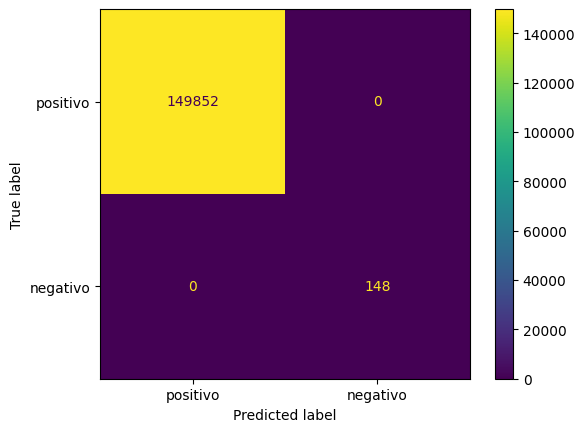

In [31]:
dtmc = confusion_matrix(testey, dtPred)
ConfusionMatrixDisplay(dtmc, display_labels=['positivo', 'negativo']).plot()

In [32]:
baredf.to_csv('botClean.csv', index=False)